Kütüphanelerin Aktarılması

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from statistics import mode
# warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

Verilerin Yüklenmesi

In [2]:
train = pd.read_csv("/workspace/KordsaIntroML/Documents/MLModels/dataset/titanic/train.csv")
test = pd.read_csv("/workspace/KordsaIntroML/Documents/MLModels/dataset/titanic/test.csv")

In [3]:
target = train.Survived

EDA (Exploratory Data Analysis)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.Pclass.unique()

array([3, 1, 2])

In [7]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

Veri tiplerini ve boş verileri tespit etmeye çalıştık

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Etikete Bakalım!!!!

Text(0.5, 1.0, 'Hayatta Kalanların Sayısı')

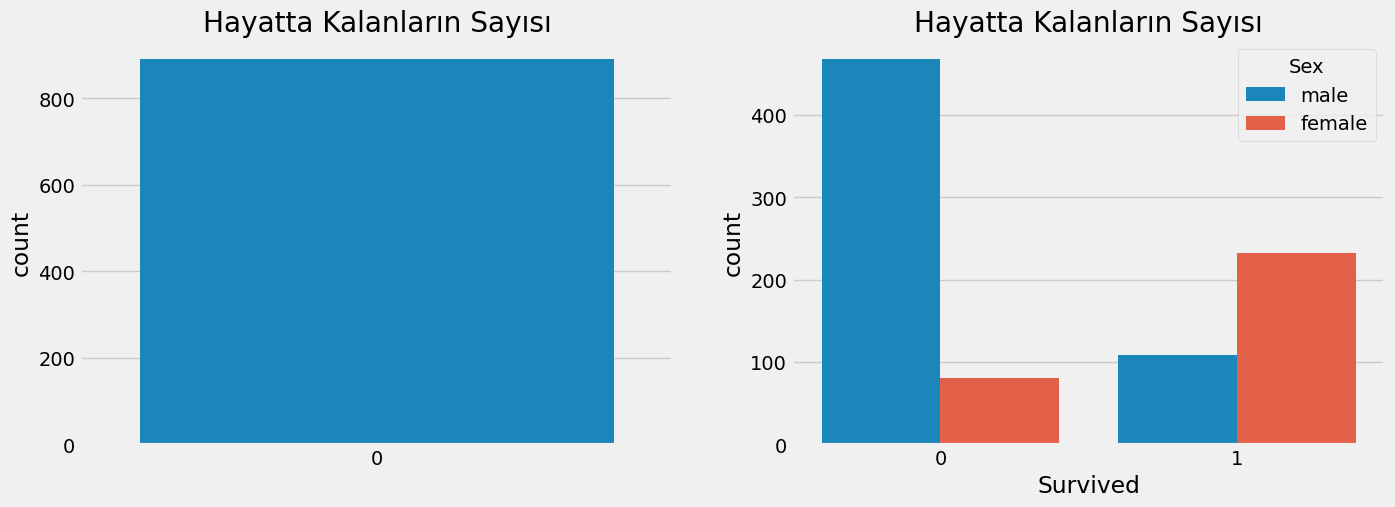

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train.Survived)
plt.title("Hayatta Kalanların Sayısı")

plt.subplot(1,2,2)
sns.countplot(x="Survived",hue="Sex",data=train)
plt.title("Hayatta Kalanların Sayısı")

/tmp/ipykernel_1196/946523844.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Boş verilerin Eğitim Setinde Dağılımı')

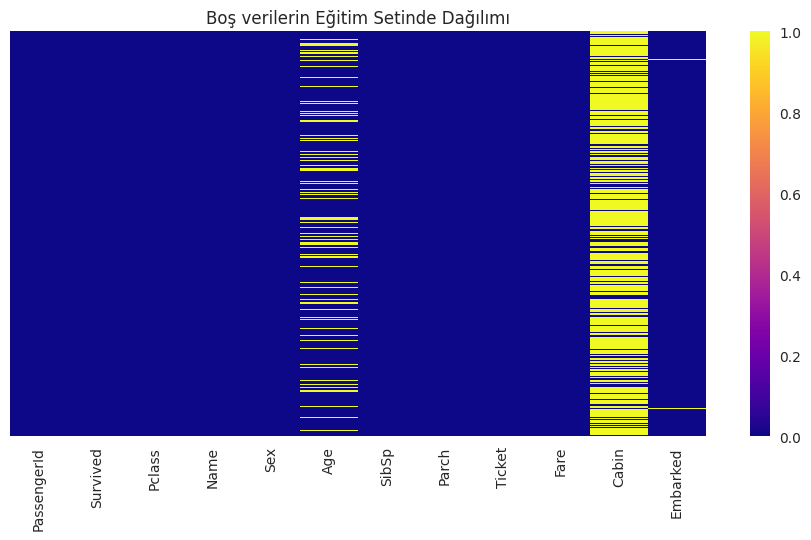

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),yticklabels=False,cmap='plasma')
plt.title("Boş verilerin Eğitim Setinde Dağılımı")

Text(0.5, 1.0, 'Hayatta Kalanların Sayısı')

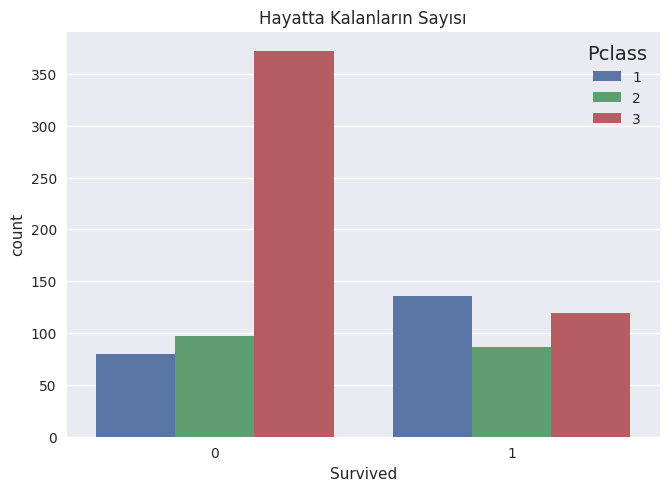

In [12]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,2)
sns.countplot(x="Survived",hue="Pclass",data=train)
plt.title("Hayatta Kalanların Sayısı")

In [13]:
pclass1 = train[train.Pclass == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = train[train.Pclass == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = train[train.Pclass == 1]['Survived'].value_counts(normalize=True).values[1]*100
print(pclass1)
print(pclass2)
print(pclass3)

62.96296296296296
47.28260869565217
37.03703703703704


<Axes: ylabel='Frequency'>

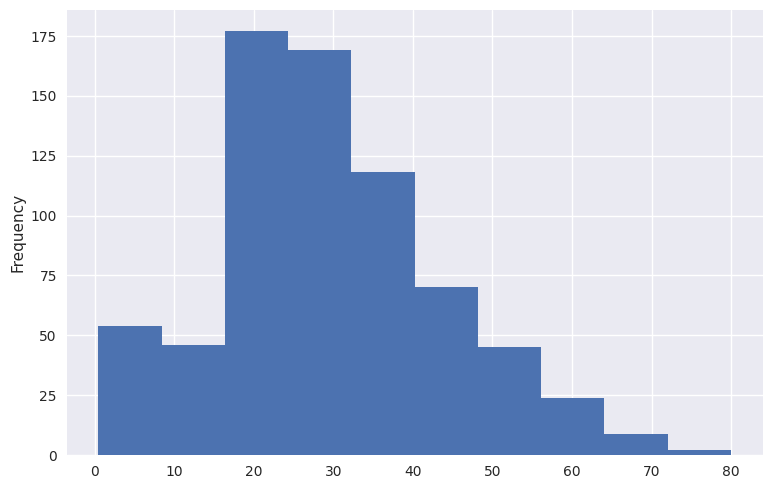

In [14]:
train['Age'].plot(kind='hist')

<Axes: >

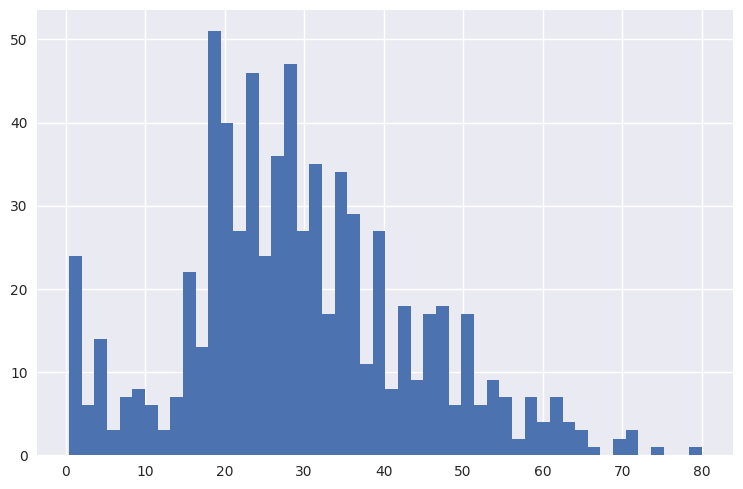

In [15]:
train['Age'].hist(bins=50)

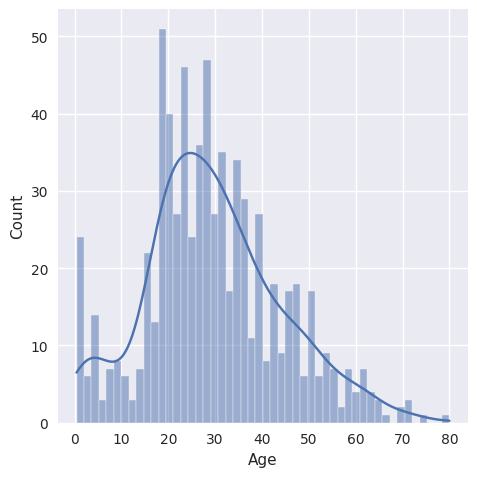

In [16]:
sns.displot(train[train["Age"]>0].Age,bins=50,kde=True)

<Axes: xlabel='SibSp', ylabel='count'>

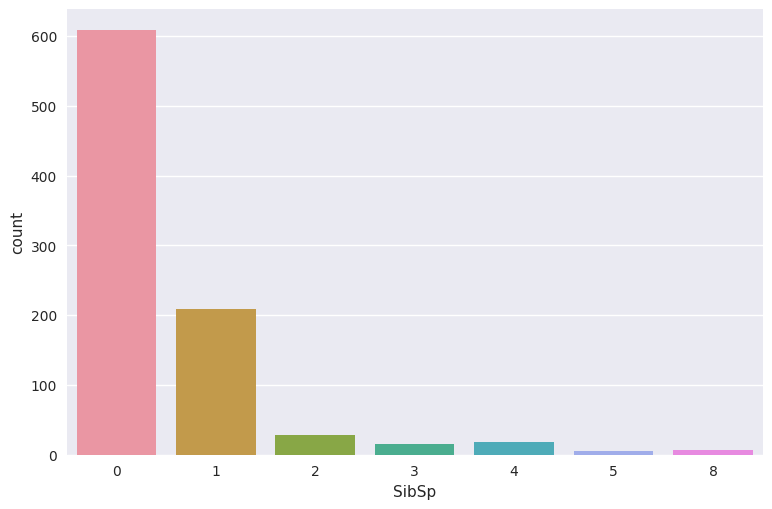

In [17]:
sns.countplot(x=train['SibSp'])

<Axes: xlabel='Survived', ylabel='count'>

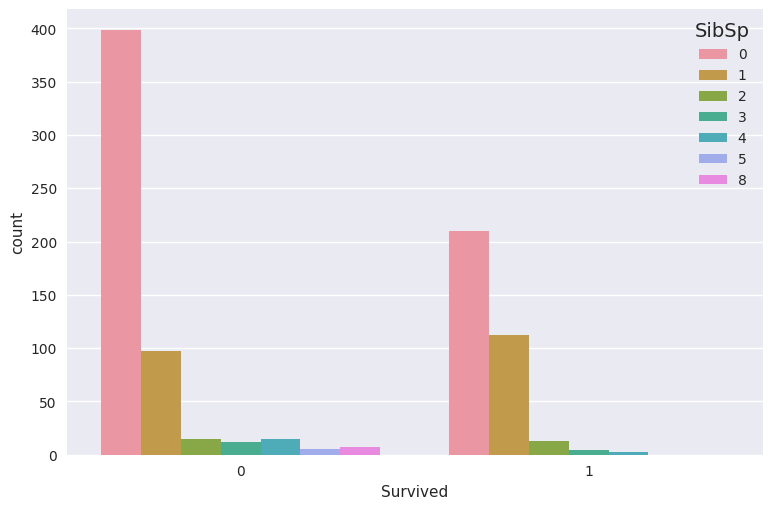

In [18]:
sns.countplot(x="Survived",hue="SibSp",data=train)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

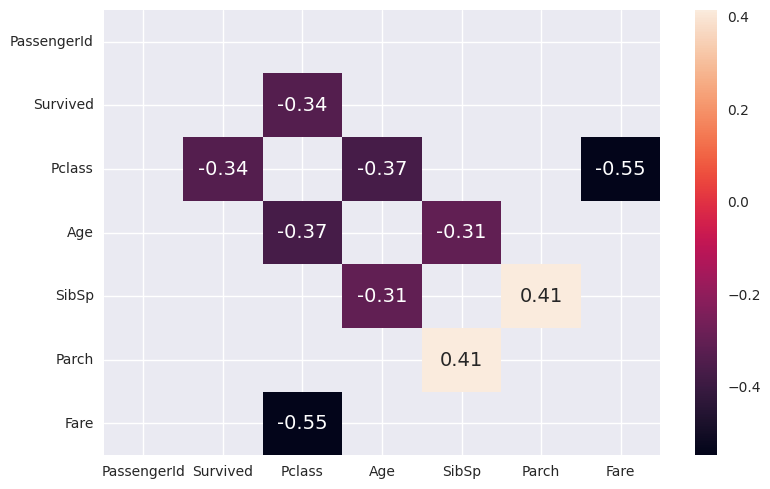

In [20]:
ornek = pd.DataFrame()
for item in train.columns:
    if str(train[item].dtype) != 'object':
        ornek[item] = train[item]
corr = ornek.corr()
sns.heatmap(corr[((corr>=0.3)| (corr<=-0.3)) & (corr != 1)],annot=True,fmt='.2f')